# Activity 9: Top 100 ebooks' name extraction from Gutenberg.org

## What is Project Gutenberg? - 
Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the **oldest digital library.** This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

## What is this activity all about?
* **This activity aims to scrape the url of the Project Gutenberg's Top 100 ebooks (yesterday's ranking) for identifying the ebook links. **
* **It uses BeautifulSoup4 for parsing the HTML and regular expression code for identifying the Top 100 ebook file numbers.**
* **You can use those book ID numbers to download the book into your local drive if you want**

### Import necessary libraries including regex, and beautifulsoup

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### Ignore SSL errors (this code will be given)

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Read the HTML from the URL

In [3]:
#Check to make sure we can get on the actual webpage
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

### Write a small function to check the status of web request

In [4]:
#Return messages in case something is wrong and we don't want to give a long error. Failed is fine.
def status_check(r):
    if r.status_code==200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1

In [5]:
#Run it
status_check(response)

Success!


1

### Decode the response and pass on to `BeautifulSoup` for HTML parsing

In [6]:
contents = response.content.decode(response.encoding)

In [7]:
soup = BeautifulSoup(contents, 'html.parser')

### Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [8]:
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

In [9]:
links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### Use regular expression to find the numeric digits in these links. <br>These are the file number for the Top 100 books.

#### Initialize empty list to hold the file numbers

In [10]:
booknum = []

* Number 19 to 118 in the original list of links have the Top 100 ebooks' number. 
* Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
* Hint: Use `findall()` method

In [11]:
for i in range(33,133):
    link = links[i]
    link = link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        booknum.append(int(n[0]))

#### Print the file numbers

In [12]:
print(booknum)

[84, 1342, 1080, 11, 5200, 844, 98, 2542, 25344, 76, 64317, 2701, 1250, 1661, 1952, 174, 160, 1260, 23, 64585, 2852, 408, 43, 219, 345, 205, 1232, 16328, 1400, 46, 2814, 19942, 74, 16, 1497, 57775, 215, 2591, 55, 768, 2600, 3207, 4300, 120, 2554, 6133, 514, 203, 42108, 158, 45, 996, 3825, 244, 5740, 829, 140, 11030, 36, 58585, 64586, 64578, 1727, 15399, 135, 1001, 35, 1184, 3090, 6130, 13415, 20203, 64577, 3600, 2500, 1998, 113, 7370, 833, 161, 42324, 902, 147, 43453, 37134, 1064, 209, 25929, 779, 863, 4517, 148, 521, 236, 376, 1934, 10623, 375, 766, 730]


### How does the `soup` object's text look like? Use `.text()` method and print only first 2000 characters (i.e. do not print the whole thing, it is long).

You will notice lot of empty spaces/blanks here and there. Ignore them. They are part of HTML page markup and its whimsical nature!

In [13]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-02-18219823
last 7 days1343588
last 30 days5807284



Top 100 EBooks yesterd

### Search in the extracted text (using regular expression) from the `soup` object to find the names of top 100 Ebooks (Yesterday's rank)

In [14]:
lst_titles_temp=[]

#### Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.

In [15]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

#### Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: `splitlines()` method

In [16]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

#### Use regular expression to extract only text from the name strings and append to an empty list
* Hint: Use `match` and `span` to find indices and use them

In [17]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match("^[3a-zA-ZÀ-ÿ-',:;.— ]*",lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

#### Print the list of titles

In [18]:
for l in lst_titles[8:]:
    print(l)

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
Pride and Prejudice by Jane Austen 
A Modest Proposal by Jonathan Swift 
Alice's Adventures in Wonderland by Lewis Carroll 
Metamorphosis by Franz Kafka 
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde 
A Tale of Two Cities by Charles Dickens 
Et dukkehjem. English by Henrik Ibsen 
The Scarlet Letter by Nathaniel Hawthorne 
Adventures of Huckleberry Finn by Mark Twain 
The Great Gatsby by F. Scott  Fitzgerald 
Moby Dick; Or, The Whale by Herman Melville 
Anthem by Ayn Rand 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Picture of Dorian Gray by Oscar Wilde 
The Awakening, and Selected Short Stories by Kate Chopin 
Jane Eyre: An Autobiography by Charlotte Brontë 
Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass 
The Trap by Dorothy M.  Richardson 
The Hound of the Baskervilles by A

**Explanation:** Is there an easy way to include all the punctuation that will appear here? I added a couple more that the book didn't include so we could get more of the titles of the books before they were cutoff. It was a real pain to get ' to appear but I got it. The only real problem I see is in stuff like "The Convict Ship, Volume 3" which should include more, but is in parenthesis, and if we include parenthesis we get the end of the lines which we don't want. It is mostly done and complete but basically any line that doesn't include "by" cut off at some point. Also the set up for this coding was from the assignment links for this week and just had fill in the blank sections that I did. 

# Activity 10: Building Your Own Database by Reading an API

In [19]:
#Step 1: Import modules we need.
import urllib.request, urllib.parse, urllib.error
import json

In [20]:
#Step 2: Open JSON file with API key. Set variable to be the key so we can use it.

with open('key.json') as f:
    keys = json.load(f)
    omdbapi = keys['API_Key']

In [21]:
#We need to make the URL. So we will do this in 3 parts. For each link of movies in the API, it looks something like
#This: http://www.omdbapi.com/?t=Titanic&apikey=29797c10. It consists of the beginning that is there in every link,
#t=(Movie title) and then an apikey=(API Key). So lets build the link and customize it so we can change the link for 
#Whatever movie we want.

#Here is the first part. This never changes

serviceurl = 'http://www.omdbapi.com/?'

In [22]:
#Let's set up the end of the URL which changes from person to person but uses our API Key which is constant. We 
#have the key saved under omdbapi from above.

apikey = '&apikey='+omdbapi

In [23]:
#Let's check that these are done correctly. We will combine them all when we make the movie section.

print('Beginning of URL: ', serviceurl)
print('End of URL: ', apikey)

Beginning of URL:  http://www.omdbapi.com/?
End of URL:  &apikey=29797c10


In [24]:
#Here we will print out the list of things we want to collect from the API. We will then print the values associated
#With these as long as they are in the API.

def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
              'Plot', 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print('-'*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f'{k}: {json_data[k]}')
    print('-'*50)

In [25]:
#And this will trake the link to the image of the poster, which is saved with the key 'Poster'. It will save the file
#Associated with the poster, and if we don't already have it saved, will save it to our computer. If we already have 
#Poster saved then it skips all this.

def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    
    savelocation = os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename, 'wb')
    f.write(poster_data)
    f.close()

In [26]:
#This is going to finally compile our complete URL. We have the beginning saved as serviceurl and the end saved as
#apikey. Now all we are missing is the title of the movie, which we can set here with (title). Then we set up a waiting 
#message, and print out the keys and values that we set earlier. We also include a way to catch errors in case
#the movie doesn't exist.

def search_movie(title):
    try:
        url=serviceurl + urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retrieving the data of "{title}" now...')
        print(url)
        uh=urllib.request.urlopen(url)
        data=uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print('Error encountered: ', json_data['Error'])
            
    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

In [27]:
#Let's see how this goes

search_movie('Titanic')

Retrieving the data of "Titanic" now...
http://www.omdbapi.com/?t=Titanic&apikey=29797c10
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,048,704
imdbID: tt0120338
--------------------------------------------------


In [28]:
#And lets try it again with a multiple word movie. Also a good one.

search_movie('The Truman Show')

Retrieving the data of "The Truman Show" now...
http://www.omdbapi.com/?t=The+Truman+Show&apikey=29797c10
--------------------------------------------------
Title: The Truman Show
Year: 1998
Rated: PG
Released: 05 Jun 1998
Runtime: 103 min
Genre: Comedy, Drama
Director: Peter Weir
Writer: Andrew Niccol
Actors: Jim Carrey, Laura Linney, Noah Emmerich, Natascha McElhone
Plot: An insurance salesman discovers his whole life is actually a reality TV show.
Language: English
Country: USA
Awards: Nominated for 3 Oscars. Another 40 wins & 66 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '90/100'}]
Metascore: 90
imdbRating: 8.1
imdbVotes: 941,803
imdbID: tt0120382
--------------------------------------------------


In [29]:
#And our errors?

search_movie('Random_Error')

Retrieving the data of "Random_Error" now...
http://www.omdbapi.com/?t=Random_Error&apikey=29797c10
Error encountered:  Movie not found!


# Connecting to the Twitter API

In [30]:
import twitter

In [31]:
api = twitter.Api(consumer_key='QV7VGxqvH6X4Uf4j8tJM66rB7',
  consumer_secret='h9GflpIrWzbUBNpqhh9ApKKpnO75JAwds03PVyjeGg7GJV29GO',
    access_token_key='1362131036918849537-FZU5FIsI9dWu4whJsfihMVpLJoquXn',
    access_token_secret='Df6WVBdc7eTp91g6RGLj1T4WdvBnPYYH5sX9c1b3qs0gO')

In [32]:
print(api.VerifyCredentials())

{"created_at": "Wed Feb 17 20:05:38 +0000 2021", "default_profile": true, "description": "For class", "id": 1362131036918849537, "id_str": "1362131036918849537", "name": "David Lattimer", "profile_background_color": "F5F8FA", "profile_image_url": "http://pbs.twimg.com/profile_images/1362131397817884677/9nP_GMb3_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1362131397817884677/9nP_GMb3_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "DavidLattimer2"}


In [33]:
api.GetSearch(term='Bitcoin', since=2021-2-10, count=10)

[Status(ID=1362600676174557186, ScreenName=elonmusk, Created=Fri Feb 19 03:11:31 +0000 2021, Text='@business To be clear, I am *not* an investor, I am an engineer. I don’t even own any publicly traded stock besides… https://t.co/OxZLHvxCVR'),
 Status(ID=1362536005060894720, ScreenName=theRealKiyosaki, Created=Thu Feb 18 22:54:32 +0000 2021, Text='Sec Treasury Yellen just said on CNBC Bitcoin is used in criminal activity. Give me a break. And the US dollar isn’… https://t.co/OfUBVNjAMQ'),
 Status(ID=1362789835770126336, ScreenName=APompliano, Created=Fri Feb 19 15:43:10 +0000 2021, Text='BREAKING: Bitcoin just reached a $1 trillion market cap for the first time in history.'),
 Status(ID=1362893678965116929, ScreenName=MichaelaBRosen, Created=Fri Feb 19 22:35:49 +0000 2021, Text='RT @Bitcoin: $55,000.\n\nAnd the bull began his run. https://t.co/wazSjQvsUT'),
 Status(ID=1362893678545670145, ScreenName=digital_mine_, Created=Fri Feb 19 22:35:48 +0000 2021, Text='RT @Wonders0331: @tyler Wha

In [34]:
api.GetSearch(term='Bellevue University', since=2019-2-10, count=10)

[Status(ID=1362762385174405120, ScreenName=RobinSchwebach, Created=Fri Feb 19 13:54:06 +0000 2021, Text="RT @DSUAthletics: (17)Women's Basketball - Won 86-75 over Bellevue University - 18TH STRAIGHT WIN and completed a perfect 14-0 NSAA record!"),
 Status(ID=1362657044084367360, ScreenName=Dallas_Fernau, Created=Fri Feb 19 06:55:30 +0000 2021, Text="RT @DSUAthletics: (17)Women's Basketball - Won 86-75 over Bellevue University - 18TH STRAIGHT WIN and completed a perfect 14-0 NSAA record!"),
 Status(ID=1362656972424716290, ScreenName=TAAslesen, Created=Fri Feb 19 06:55:13 +0000 2021, Text="RT @DSUAthletics: (17)Women's Basketball - Won 86-75 over Bellevue University - 18TH STRAIGHT WIN and completed a perfect 14-0 NSAA record!"),
 Status(ID=1362638358640435200, ScreenName=HSUnivOsanJRR25, Created=Fri Feb 19 05:41:15 +0000 2021, Text='RT @FransChocolates: Smoked Salt or Gray Salt Caramel? The classic confections for the classic Valentine. 💘 Stop by our Downtown, Universit…'),
 Status(ID=1

# Making 3 Graphs on Candy Dataframe

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
candy = pd.read_excel('CANDY-HIERARCHY-2015-SURVEY-Responses.xlsx')

In [37]:
list(candy.columns)

['Timestamp',
 'How old are you?',
 'Are you going actually going trick or treating yourself?',
 ' [Butterfinger]',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers]',
 ' [Bottle Caps]',
 ' [Box’o’ Raisins]',
 ' [Brach products (not including candy corn)]',
 ' [Bubble Gum]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Vials of pure high fructose corn syrup, for main-lining into your vein]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Cash, or other forms of legal tender]',
 ' [Chiclets]',
 ' [Caramellos]',
 ' [Snickers]',
 ' [Dark Chocolate Hershey]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Broken glow stick]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball cards]',
 ' [Gummy Bears straight up]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [He

In [38]:
candy[' [Reese’s Peanut Butter Cups]'].value_counts()

JOY        4874
DESPAIR     499
Name:  [Reese’s Peanut Butter Cups], dtype: int64

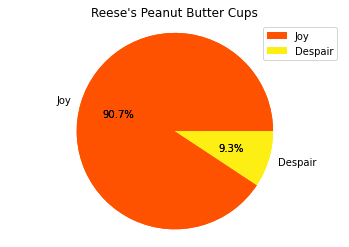

In [39]:
#Plot 1: Pie Chart of Reese's Cups

labels = 'Joy', 'Despair'
sizes = [4874, 499]

colors = ("#fe5200", "#fdef14") 
fig1, ax1 = plt.subplots()
 
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%')
patches, texts, auto = ax1.pie(sizes, colors=colors, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="best")
plt.title("Reese's Peanut Butter Cups")
plt.axis('equal')
plt.show()

In [40]:
candy = candy.applymap(lambda s:s.title() if type(s) == str else s)
vcs = pd.DataFrame(candy['What is your favourite font?'].value_counts().reset_index().values, columns=['Font', 'Count'])


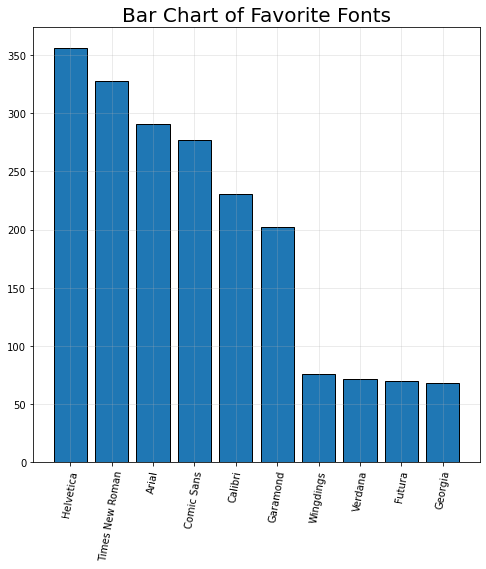

In [41]:
#Plot 2: Bar Chart of Favorite Fonts

plt.figure(figsize=(8,8))
plt.bar(vcs[:10].Font.astype(str), vcs[:10].Count.astype(int), edgecolor='k')
plt.xticks(rotation=80)
plt.title('Bar Chart of Favorite Fonts', fontsize=20)
plt.grid(True, alpha=0.3)

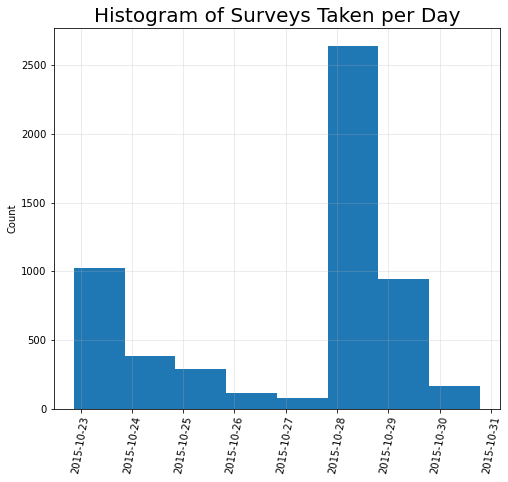

In [42]:
#Plot 3: Making a histogram of people filling out the survey by day

plt.figure(figsize=(8,7))
plt.hist(candy.Timestamp, bins=8, align='left')
plt.xticks(rotation=80)
plt.title('Histogram of Surveys Taken per Day', fontsize=20)
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

Sorry for including both bar and histogram. I wanted to make a scatter of ages and a typically old person candy (Werther Originals weren't on here so maybe Dots or something) just to see if I could see a difference in ages of people who like things. Unfortunately the age column wasn't just a drop down and select menu so it is a mess to work with. Like really bad. Someone decided to make their age the first 8102 digits of pi. And a lot of people just wrote in funny responses. It was a pain and frustrating to get ready to be put into a scatter so I passed

In [43]:
len(candy['How old are you?'][3337])

8102